![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 8: Text processing continued

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-24)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Session_8/08_Text_processing_continued.ipynb)

**Resources:**

* Advances from CDA class on PCA and t-SNE


# Spacy installation

```
$ conda activate bts36
$ conda install -c conda-forge spacy
```



# Spacy introduction

## Import language models 



```
$ python -m spacy download en_core_web_sm
$ python -m spacy download en
```



In [1]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/scientist/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/home/scientist/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


Once the model is downloaded and installed, we can load it as follows:

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Text similarity

Embedded words can be compared with each other based on the context, i.e. how far backwards the word embedding looks. 

In this case, we can pass a string of words and see how far appart their PCA components are:

## Using PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 

Source: Wikipedia

In [4]:
import numpy as np
import spacy
from sklearn.decomposition import PCA

# We load the language model
nlp = spacy.load("en")
animals = "plane plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

# Pass the tokens to a Doc
animal_tokens = nlp(animals)

# Create a vector of tokens with numpy
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 2 components
pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)

In [5]:
animal_vectors.shape

(21, 96)

In [6]:
print(animal_vecs_transformed)

[[ 3.7038252   6.468906  ]
 [-1.1741358   4.0896006 ]
 [-0.16238593 -2.5786974 ]
 [-2.56718    -6.4171486 ]
 [-3.5974364   2.3254027 ]
 [-3.0677652   3.9874434 ]
 [-8.530927   -0.34376124]
 [-1.8913131  -5.969156  ]
 [-5.9605994   1.9464009 ]
 [-2.659137    0.11763348]
 [-6.838098    7.086054  ]
 [ 0.28598672 -5.1448536 ]
 [-3.4963307  -4.499029  ]
 [-2.8454604  10.6626835 ]
 [-0.29156762  2.2006094 ]
 [-2.8210912  -4.526504  ]
 [-2.1752033  -6.109652  ]
 [ 4.814269   -7.816438  ]
 [ 7.6744103   0.9065207 ]
 [10.8131      2.3152435 ]
 [20.787027    1.2987458 ]]


In [7]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]

In [8]:
print(animal_vecs_transformed)

[['plane' '3.7038252' '6.468906']
 ['plane' '-1.1741358' '4.0896006']
 ['dog' '-0.16238593' '-2.5786974']
 ['cat' '-2.56718' '-6.4171486']
 ['hamster' '-3.5974364' '2.3254027']
 ['lion' '-3.0677652' '3.9874434']
 ['tiger' '-8.530927' '-0.34376124']
 ['elephant' '-1.8913131' '-5.969156']
 ['cheetah' '-5.9605994' '1.9464009']
 ['monkey' '-2.659137' '0.117633484']
 ['gorilla' '-6.838098' '7.086054']
 ['antelope' '0.28598672' '-5.1448536']
 ['rabbit' '-3.4963307' '-4.499029']
 ['mouse' '-2.8454604' '10.6626835']
 ['rat' '-0.29156762' '2.2006094']
 ['zoo' '-2.8210912' '-4.526504']
 ['home' '-2.1752033' '-6.109652']
 ['pet' '4.814269' '-7.816438']
 ['fluffy' '7.6744103' '0.9065207']
 ['wild' '10.8131' '2.3152435']
 ['domesticated' '20.787027' '1.2987458']]


In [9]:
component_1 = [float(x) for x in animal_vecs_transformed[:, 1]]
component_2 = [float(x) for x in animal_vecs_transformed[:, 2]]

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_1, component_2)

for i, txt in enumerate(animal_vecs_transformed[:, 0]):
    ax.annotate(txt, (component_1[i], component_2[i]))

## Using t-SNE

**t-Distributed Stochastic Neighbor Embedding** (t-SNE) is a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large real-world datasets. 

*Source: Laurens van der Maaten*

Visualizing high-dimensional data by projecting it into a low-dimensional space is a classic operation that anyone working with data has probably done at least once in their life. There are a huge variety of methods for reducing dimensionality, but one very popular method is t-SNE, a method proposed by Geoffry Hinton’s group back in 2008.

### Benefits of t-SNE
* t-SNE, unlike PCA, is not a linear projection. It uses the **local relationships** between points to create a low-dimensional mapping. This allows it to capture **non-linear structure**.
* t-SNE creates a **probability distribution** using the **Gaussian** distribution that defines the relationships between the points in high-dimensional space.
* t-SNE uses the **Student t-distribution** to **recreate** the probability distribution in low-dimensional space. This prevents the **crowding problem**, where points tend to get crowded in low-dimensional space due to the **curse of dimensionality**.
* t-SNE optimizes the embeddings directly using gradient descent. The cost function is non-convex though, meaning there is the risk of getting stuck in local minima. t-SNE uses multiple tricks to try to avoid this problem.

Source: [ML explained](https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/)

### 2D

Perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

In [11]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

# We load the language model
nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

# Pass the tokens to a Doc
animal_tokens = nlp(animals)

# Create a vector of tokens with numpy
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a TSNE of 2 components
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=5)
animal_vecs_tsne = tsne.fit_transform(animal_vectors)

In [12]:
print(animal_vecs_tsne)

[[ 179.81245     25.452269 ]
 [-107.335205   -94.19075  ]
 [ -96.95692    409.6969   ]
 [ 453.7263     104.121635 ]
 [-288.16043   -178.8659   ]
 [-293.04807    -13.215194 ]
 [-223.52155    458.05707  ]
 [-446.06128    109.37755  ]
 [ 125.43852    238.67911  ]
 [ 475.40652   -152.06398  ]
 [ 225.86043    553.3453   ]
 [ 195.70638    444.5209   ]
 [ 499.19748    -19.338306 ]
 [-185.0521    -264.37732  ]
 [  -4.5948315  325.1445   ]
 [ -70.48307     74.01716  ]
 [ 111.44362   -420.18362  ]
 [-192.55646   -403.10834  ]
 [-123.88921   -578.0738   ]
 [-211.3013    -713.4541   ]]


In [13]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
animal_vecs_tsne = np.c_[animals.split(), animal_vecs_tsne]

In [14]:
print(animal_vecs_tsne)

[['plane' '179.81245' '25.452269']
 ['dog' '-107.335205' '-94.19075']
 ['cat' '-96.95692' '409.6969']
 ['hamster' '453.7263' '104.121635']
 ['lion' '-288.16043' '-178.8659']
 ['tiger' '-293.04807' '-13.215194']
 ['elephant' '-223.52155' '458.05707']
 ['cheetah' '-446.06128' '109.37755']
 ['monkey' '125.43852' '238.67911']
 ['gorilla' '475.40652' '-152.06398']
 ['antelope' '225.86043' '553.3453']
 ['rabbit' '195.70638' '444.5209']
 ['mouse' '499.19748' '-19.338306']
 ['rat' '-185.0521' '-264.37732']
 ['zoo' '-4.5948315' '325.1445']
 ['home' '-70.48307' '74.01716']
 ['pet' '111.44362' '-420.18362']
 ['fluffy' '-192.55646' '-403.10834']
 ['wild' '-123.88921' '-578.0738']
 ['domesticated' '-211.3013' '-713.4541']]


In [15]:
component_1_tsne = [float(x) for x in animal_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in animal_vecs_tsne[:, 2]]
distance = [float(x)-float(y) for x, y in zip(animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2])]

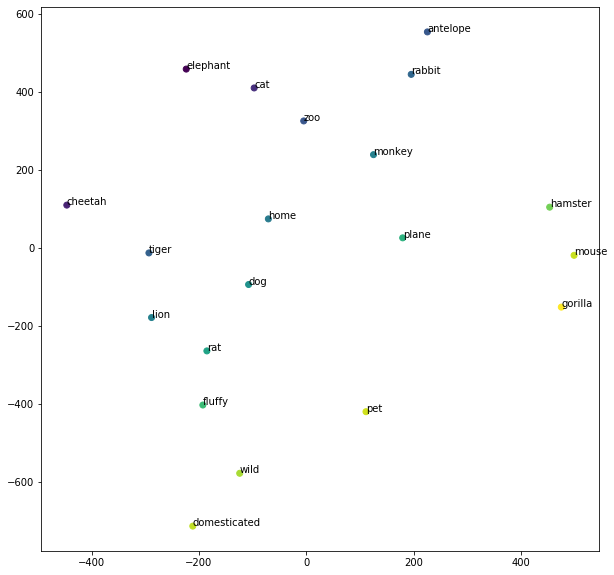

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

for i, txt in enumerate(animal_vecs_tsne[:, 0]):
    ax.annotate(txt, (component_1_tsne[i], component_2_tsne[i]))

### 3D

Perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

In [17]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

# We load the language model
nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

# Pass the tokens to a Doc
animal_tokens = nlp(animals)

# Create a vector of tokens with numpy
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 3 components
tsne = TSNE(n_components=3, init='random', random_state=0, perplexity=5)
animal_vecs_tsne = tsne.fit_transform(animal_vectors)

In [18]:
print(animal_vecs_tsne)

[[-144.23521    144.35641    123.91009  ]
 [  77.04301    407.4457    -305.58002  ]
 [  86.14582    247.36487     16.093472 ]
 [  98.0471     102.909805  -248.2306   ]
 [   6.8360558  -41.008274    -7.664533 ]
 [-143.3619    -154.64012    -84.59605  ]
 [  71.166756    29.679232   283.24847  ]
 [ 470.7428      21.942648   -18.115654 ]
 [-292.08563     33.96831    -21.644    ]
 [-372.8971    -202.62883     82.481064 ]
 [  40.44988   -252.5583    -195.9495   ]
 [-287.7127      45.151287  -267.7598   ]
 [ -71.94704     85.90212   -230.52844  ]
 [ 236.7161      -7.2663083 -136.63148  ]
 [ 249.99402    205.8323      69.05683  ]
 [ -16.484901  -448.1228     232.76527  ]
 [ 345.78848    -65.98651    638.6702   ]
 [-504.36917     93.23453     79.670746 ]
 [ 220.87492    -72.48303    114.75772  ]
 [-164.4533    -106.6663     236.31006  ]]


In [19]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
animal_vecs_tsne = np.c_[animals.split(), animal_vecs_tsne]

In [20]:
print(animal_vecs_tsne)

[['plane' '-144.23521' '144.35641' '123.91009']
 ['dog' '77.04301' '407.4457' '-305.58002']
 ['cat' '86.14582' '247.36487' '16.093472']
 ['hamster' '98.0471' '102.909805' '-248.2306']
 ['lion' '6.8360558' '-41.008274' '-7.664533']
 ['tiger' '-143.3619' '-154.64012' '-84.59605']
 ['elephant' '71.166756' '29.679232' '283.24847']
 ['cheetah' '470.7428' '21.942648' '-18.115654']
 ['monkey' '-292.08563' '33.96831' '-21.644']
 ['gorilla' '-372.8971' '-202.62883' '82.481064']
 ['antelope' '40.44988' '-252.5583' '-195.9495']
 ['rabbit' '-287.7127' '45.151287' '-267.7598']
 ['mouse' '-71.94704' '85.90212' '-230.52844']
 ['rat' '236.7161' '-7.2663083' '-136.63148']
 ['zoo' '249.99402' '205.8323' '69.05683']
 ['home' '-16.484901' '-448.1228' '232.76527']
 ['pet' '345.78848' '-65.98651' '638.6702']
 ['fluffy' '-504.36917' '93.23453' '79.670746']
 ['wild' '220.87492' '-72.48303' '114.75772']
 ['domesticated' '-164.4533' '-106.6663' '236.31006']]


In [21]:
component_1_tsne = [float(x) for x in animal_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in animal_vecs_tsne[:, 2]]
component_3_tsne = [float(x) for x in animal_vecs_tsne[:, 3]]
distance = [np.sqrt(np.power(float(x), 2) + np.power(float(y), 2) + np.power(float(z), 2)) for x, y, z in zip(animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2], animal_vecs_tsne[:, 3])]

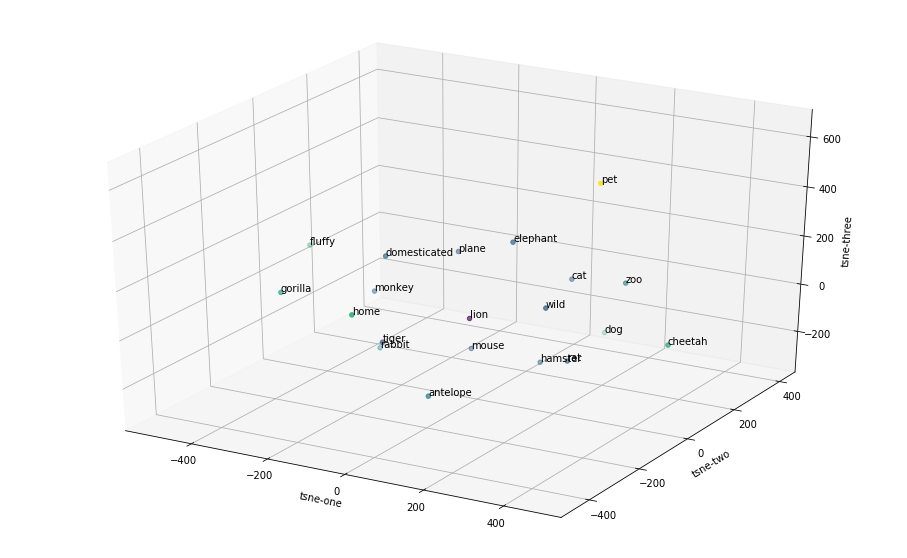

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=component_1_tsne, 
    ys=component_2_tsne, 
    zs=component_3_tsne, 
    c=distance
)

for name, x, y, z in zip(animal_vecs_tsne[:, 0], animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2], animal_vecs_tsne[:, 3]):
    ax.text(float(x), float(y), float(z), name)

ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

## Exercise distance through t-SNE:

Generate a scatter plot with the distance of the words in the following file. Use the file below and load it correctly, beware not to load it as html! Use either PCA or t-SNE to cluster the words, play with different language models. For extra points, find the way to annotate the labels without clustering them, using arrows for instance. [Hint](https://stackoverflow.com/questions/40021676/pyplot-label-scatter-plot-with-coincident-points-overlapping-annotations).

In [23]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [24]:
! wget 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/1-1000.txt'

--2020-11-26 07:49:10--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/1-1000.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.192.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5830 (5.7K) [text/plain]
Saving to: ‘1-1000.txt.2’

1-1000.txt.2        100%[===================>]   5.69K  --.-KB/s    in 0s      

2020-11-26 07:49:10 (13.9 MB/s) - ‘1-1000.txt.2’ saved [5830/5830]



In [25]:
!pwd

/home/scientist/projects/bts-dsf-2020/Session_8


In [26]:
#They aren't 1000 words
!wc -l 1-1000.txt

997 1-1000.txt


In [27]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

# We load the language model
nlp = spacy.load("en_core_web_lg")

In [28]:
w_vectors = dict()
for key, vector in nlp.vocab.vectors.items():
    try:
        w_name = nlp.vocab.strings[key]
        w_vectors[w_name] = vector
    except KeyError:
        continue

In [29]:
len(w_vectors)

684830

In [30]:
# Words common in english
words = open('1-1000.txt', 'r').read()

# Pass the tokens to a Doc
word_tokens = nlp(words)

In [31]:
l = []
for token in word_tokens:
    if token.is_space:
        #print(token.text)
        pass
    elif token.has_vector:
        l.append(token.text)
        #print(token.text)
len(l)
#print(l)

997

In [32]:
import collections

for item, count in collections.Counter(l).items():
    if count > 1:
        print(item)

In [33]:
for token in word_tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

the True 4.70935 False

 False 0.0 False
of True 4.97793 False

 False 0.0 False
to True 4.74484 False

 False 0.0 False
and True 4.6577983 False

 False 0.0 False
a True 5.306696 False

 False 0.0 False
inhis False 0.0 True

 False 0.0 False
is True 4.890306 False

 False 0.0 False
it True 4.9409766 False

 False 0.0 False
you True 5.1979666 False

 False 0.0 False
that True 4.8260193 False

 False 0.0 False
he True 6.080851 False

 False 0.0 False
was True 5.4562387 False

 False 0.0 False
for True 4.8435082 False

 False 0.0 False
on True 5.218119 False

 False 0.0 False
are True 5.41568 False

 False 0.0 False
with True 4.7708583 False

 False 0.0 False
as True 4.5106106 False

 False 0.0 False
I True 6.4231944 False

 False 0.0 False
his True 6.333511 False

 False 0.0 False
they True 5.409625 False

 False 0.0 False
be True 4.9934616 False

 False 0.0 False
at True 6.0998254 False

 False 0.0 False
one True 4.5981426 False

 False 0.0 False
have True 5.036123 False

 False 0.0 Fa

better True 5.1071477 False

 False 0.0 False
true True 5.6407886 False

 False 0.0 False
during True 6.033908 False

 False 0.0 False
hundred True 6.193457 False

 False 0.0 False
five True 5.5763273 False

 False 0.0 False
remember True 5.0913525 False

 False 0.0 False
step True 5.6605105 False

 False 0.0 False
early True 6.069055 False

 False 0.0 False
hold True 5.2284913 False

 False 0.0 False
west True 6.6147976 False

 False 0.0 False
ground True 5.8529544 False

 False 0.0 False
interest True 5.751332 False

 False 0.0 False
reach True 5.5850053 False

 False 0.0 False
fast True 6.1058073 False

 False 0.0 False
verb True 7.2803655 False

 False 0.0 False
sing True 7.001153 False

 False 0.0 False
listen True 6.3198338 False

 False 0.0 False
six True 5.694776 False

 False 0.0 False
table True 6.497495 False

 False 0.0 False
travel True 6.845164 False

 False 0.0 False
less True 5.50791 False

 False 0.0 False
morning True 6.341368 False

 False 0.0 False
ten True 5.464378


 False 0.0 False
brother True 6.4884334 False

 False 0.0 False
egg True 7.120721 False

 False 0.0 False
ride True 6.5781293 False

 False 0.0 False
cell True 7.496733 False

 False 0.0 False
believe True 5.2804604 False

 False 0.0 False
fraction True 5.8483586 False

 False 0.0 False
forest True 7.0927925 False

 False 0.0 False
sit True 5.782645 False

 False 0.0 False
race True 7.0594034 False

 False 0.0 False
window True 6.5808506 False

 False 0.0 False
store True 6.415619 False

 False 0.0 False
summer True 6.178712 False

 False 0.0 False
train True 6.5946126 False

 False 0.0 False
sleep True 6.978046 False

 False 0.0 False
prove True 5.3840494 False

 False 0.0 False
lone True 5.462747 False

 False 0.0 False
leg True 6.976545 False

 False 0.0 False
exercise True 6.971987 False

 False 0.0 False
wall True 6.5150175 False

 False 0.0 False
catch True 5.696549 False

 False 0.0 False
mount True 7.11542 False

 False 0.0 False
wish True 5.1652417 False

 False 0.0 False
sky

 False 0.0 False
truck True 6.972262 False

 False 0.0 False
noise True 7.0021725 False

 False 0.0 False
level True 6.0334334 False

 False 0.0 False
chance True 5.3155055 False

 False 0.0 False
gather True 5.629844 False

 False 0.0 False
shop True 5.981412 False

 False 0.0 False
stretch True 6.3249245 False

 False 0.0 False
throw True 5.972971 False

 False 0.0 False
shine True 6.263512 False

 False 0.0 False
property True 6.948452 False

 False 0.0 False
column True 6.581378 False

 False 0.0 False
molecule True 7.6794105 False

 False 0.0 False
select True 6.001909 False

 False 0.0 False
wrong True 5.3789964 False

 False 0.0 False
gray True 6.436013 False

 False 0.0 False
repeat True 5.841065 False

 False 0.0 False
require True 5.751105 False

 False 0.0 False
broad True 5.7844152 False

 False 0.0 False
prepare True 6.0776315 False

 False 0.0 False
salt True 7.353226 False

 False 0.0 False
nose True 6.936802 False

 False 0.0 False
plural True 6.5638547 False

 False 0.

In [34]:
# Create a vector of tokens with numpy
word_vectors = np.vstack([word.vector for word in word_tokens if word.has_vector and not word.is_space])
print(len(word_vectors))

997


In [35]:
#Run a PCA of 2 components
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=1)
word_vecs_tsne = tsne.fit_transform(word_vectors)

In [36]:
print(word_vecs_tsne)

[[  4.7979336  66.96764  ]
 [  4.7643237  66.944725 ]
 [ -3.582294  -39.829243 ]
 ...
 [-61.19757    16.714693 ]
 [  1.5371858 -56.49966  ]
 [-65.335594   21.889463 ]]


In [37]:
len(l)

997

In [38]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
word_vecs_tsne = np.c_[l, word_vecs_tsne]

In [39]:
print(word_vecs_tsne)

[['the' '4.7979336' '66.96764']
 ['of' '4.7643237' '66.944725']
 ['to' '-3.582294' '-39.829243']
 ...
 ['teeth' '-61.19757' '16.714693']
 ['shell' '1.5371858' '-56.49966']
 ['neck' '-65.335594' '21.889463']]


In [40]:
component_1_tsne = [float(x) for x in word_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in word_vecs_tsne[:, 2]]
distance = [float(x)-float(y) for x, y in zip(word_vecs_tsne[:, 1], word_vecs_tsne[:, 2])]
more_distant = max(distance)

161.9851452 156.10558 -5.8795652


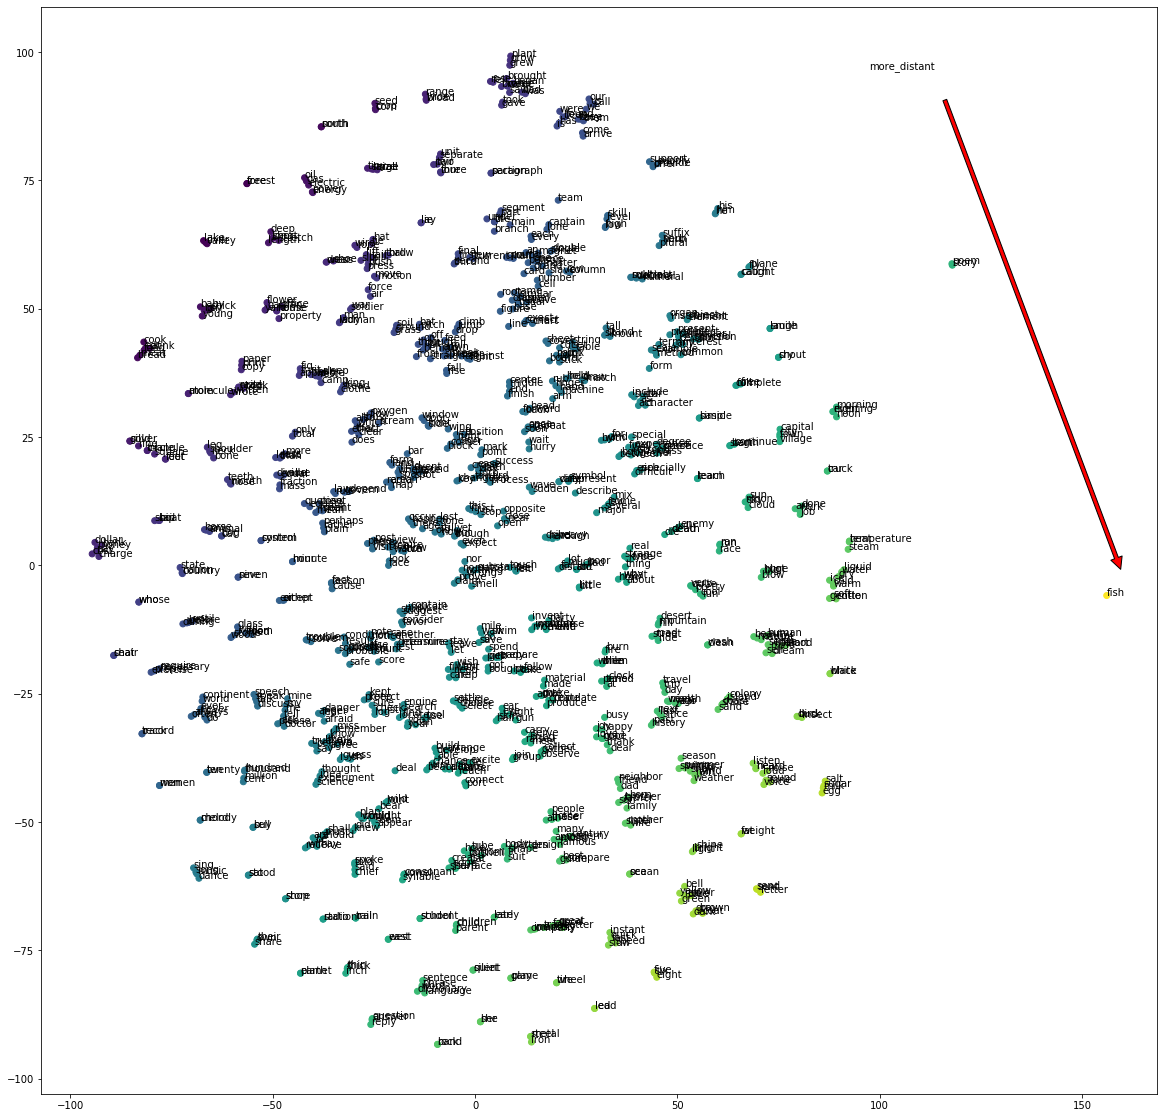

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

for i, txt in enumerate(word_vecs_tsne[:, 0]):
    #if (component_2_tsne[i] - component_1_tsne[i]) == more_distant:
    if txt == 'fish':
        print(more_distant, component_1_tsne[i], component_2_tsne[i])
        ax.annotate('more_distant', xy=(more_distant, component_2_tsne[i]),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
    ax.annotate(txt, (component_1_tsne[i], component_2_tsne[i]))

# Examples with Jaccard similarity and tf-idf

In [42]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

## Jaccard similarity: exercise example

1. Write a function `lemmatize` that receives a spaCy `Doc` and returns a list of lemmas as strings, removing stopwords, punctuation signs and whitespace
2. Write a function that receives two spaCy `Doc`s and returns a floating point number representing the Jaccard similarity (see formula below) (hint: use [`set`s](https://docs.python.org/3/library/stdtypes.html#set))
3. Compute the Jaccard similarity between `t0` and `t1`
4. Create a pandas `DataFrame` that holds the Jaccard similarity of all the text combinations from `t0` to `t6` (hint: use [`enumerate`](http://book.pythontips.com/en/latest/enumerate.html#enumerate))

$$ J(A,B) = {{|A \cap B|}\over{|A \cup B|}} $$

### Function to lemmatize the spaCy Doc

In [43]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [44]:
nlp = spacy.load("en")

In [45]:
def lemmatize(doc):
    return [token.lemma_ for token in doc if not
           (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]

In [46]:
lemmatize(nlp(t0))

['China',
 'strong',
 'economy',
 'grow',
 'rapid',
 'pace',
 'politically',
 'differ',
 'greatly',
 'Economy']

### Jaccard index function

In [47]:
def jaccard(doc1, doc2):
    s1 = set(lemmatize(doc1))
    s2 = set(lemmatize(doc2))
    return len(s1.intersection(s2)) / len(s1.union(s2))

#### Computation of t0 - t1

In [48]:
jaccard(nlp(t0), nlp(t1))

0.0625

### Create a pandas DataFrame that holds the Jaccard similarity of all the text combinations from t0 to t6 

In [49]:
import numpy as np
import pandas as pd

In [50]:
data = np.zeros((7, 7))
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]
for ii, doc_a in enumerate(docs):
    for jj, doc_b in enumerate(docs):
        data[ii, jj] = jaccard(doc_a, doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.000000,0.0625,0.000000,0.055556,0.000000,0.050000,0.000
1,0.062500,1.0000,0.000000,0.000000,0.000000,0.000000,0.000
2,0.000000,0.0000,1.000000,0.047619,0.266667,0.000000,0.000
3,0.055556,0.0000,0.047619,1.000000,0.000000,0.052632,0.125
4,0.000000,0.0000,0.266667,0.000000,1.000000,0.000000,0.000
5,0.050000,0.0000,0.000000,0.052632,0.000000,1.000000,0.000
6,0.000000,0.0000,0.000000,0.125000,0.000000,0.000000,1.000


## Exercise Jaccard similarity:

Collect at least 6 sentences from political parties in your country. Try to do Jaccard Similarity on them so that you can see how similar the sentences are between the parties. You neeed to translate the sentences to english, so that I can evaluate :)

In [51]:
file_name = 'politicalNews.txt'
proc_file_text = open(file_name).read()
!more 

more: bad usage
Try 'more --help' for more information.


In [52]:
df=pd.read_csv(file_name, sep = "\n", header=None)
df

,0
0,The U.S. needs to take a “strategic approach” ...
1,AI is an area that is going to only develop in...
2,Zambia last week opted to bow out of a $42.5 m...
3,G-20 nations have deployed an unprecedented $1...
4,Egyptian billionaire Naguib Sawiris leveled st...
5,"DUBAI, United Arab Emirates — The United Arab ..."
6,The announcement by Russia’s sovereign wealth ...


In [53]:
proc_file_text_doc = nlp(proc_file_text)
print ([token.text for token in proc_file_text_doc])

['The', 'U.S.', 'needs', 'to', 'take', 'a', '“', 'strategic', 'approach', '”', 'as', 'it', 'competes', 'with', 'China', 'on', 'artificial', 'intelligence', ',', 'according', 'to', 'a', 'Nasdaq', 'executive', '.', '\n', 'AI', 'is', 'an', 'area', 'that', 'is', 'going', 'to', 'only', 'develop', 'in', 'partnership', 'with', 'government', ',', 'and', 'U.S.', 'authorities', 'need', 'to', 'get', 'involved', ',', 'said', 'Edward', 'Knight', ',', 'vice', 'chairman', 'of', 'Nasdaq', '.', '\n', 'Zambia', 'last', 'week', 'opted', 'to', 'bow', 'out', 'of', 'a', '$', '42.5', 'million', 'eurobond', 'repayment', ',', 'becoming', 'the', 'first', 'African', 'nation', 'to', 'default', 'on', 'its', 'debt', 'in', 'the', 'Covid-19', 'era', '.', '\n', 'G-20', 'nations', 'have', 'deployed', 'an', 'unprecedented', '$', '11', 'trillion', 'so', 'far', 'to', 'accelerate', 'an', 'equitable', 'and', 'sustainable', 'economic', 'recovery', 'from', 'the', 'coronavirus', 'crisis', ',', 'according', 'to', 'a', 'report',

In [54]:
t0 = "The U.S. needs to take a “strategic approach” as it competes with China on artificial intelligence, according to a Nasdaq executive."
t1 = "AI is an area that is going to only develop in partnership with government, and U.S. authorities need to get involved, said Edward Knight, vice chairman of Nasdaq."
t2 = "Zambia last week opted to bow out of a $42.5 million eurobond repayment, becoming the first African nation to default on its debt in the Covid-19 era."
t3 = "G-20 nations have deployed an unprecedented $11 trillion so far to accelerate an equitable and sustainable economic recovery from the coronavirus crisis, according to a report released ahead of the G-20 leaders’ summit in Saudi Arabia this week."
t4 = "Egyptian billionaire Naguib Sawiris leveled strongly worded criticism at Turkey’s President Recep Tayyip Erdogan this week, accusing the leader of making a “very big mess” in the Middle East."
t5 = "DUBAI, United Arab Emirates — The United Arab Emirates is now the closest it’s ever been to getting choice American weapons it has wanted for several years: lethal drones and F-35 joint strike fighter jets."
t6 = "The announcement by Russia’s sovereign wealth fund RDIF came two days after U.S. pharmaceutical giant Pfizer and its German partner BioNTech said their vaccine was more than 90% effective in phase three trials."

In [55]:
jaccard(nlp(t0), nlp(t1))

0.125

In [56]:
data = np.zeros((7, 7))
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]
for ii, doc_a in enumerate(docs):
    for jj, doc_b in enumerate(docs):
        data[ii, jj] = jaccard(doc_a, doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.000000,0.125000,0.000000,0.028571,0.000000,0.0,0.032258
1,0.125000,1.000000,0.000000,0.000000,0.000000,0.0,0.057143
2,0.000000,0.000000,1.000000,0.081081,0.028571,0.0,0.000000
3,0.028571,0.000000,0.081081,1.000000,0.045455,0.0,0.000000
4,0.000000,0.000000,0.028571,0.045455,1.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
6,0.032258,0.057143,0.000000,0.000000,0.000000,0.0,1.000000


## TF - IDF: exercise example

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf–idf.

*Source: Wikipedia*

1. Write a function `tf` that receives a string and a spaCy `Doc` and returns the number of times the word appears in the `lemmatize`d `Doc`
2. Write a function `idf` that receives a string and a list of spaCy `Doc`s and returns the number of docs that contain the word
3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`.
4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s
5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents
6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.
7. Visualize the TF-IDF, like this:

![alt text](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/tf-idf.png)

In [57]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

In [58]:
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]

for doc in docs:
    print(doc)

China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy.
At last, China seems serious about confronting an endemic problem: domestic violence and corruption.
Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people.
Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled.
What's the future of Abenomics? We asked Shinzo Abe for his views
Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily.
Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses.


### Step 1
Write a function tf that receives a string and a spaCy Doc and returns the number of times the word appears in the lemmatized Doc

In [59]:
from collections import Counter

In [60]:
def tf(word, doc):
    counts = Counter(lemmatize(doc))
    return counts[word]

In [61]:
tf('horse', nlp(t6))

2

### Step 2
Write a function idf that receives a string and a list of spaCy Docs and returns the number of docs that contain the word

In [62]:
lemmatize(nlp(t6))

['Vladimir',
 'Putin',
 'find',
 'ride',
 'horse',
 'shirt',
 'hunt',
 'deer',
 'Vladimir',
 'Putin',
 'thing',
 'ride',
 'horse']

In [63]:
def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1
    return count / len(docs)

In [64]:
idf('horse', docs)

0.14285714285714285

### Step 3
Write a function tf_idf that receives a string, a spaCy Doc and a list of spaCy Docs and returns the product of tf(t, d) · idf(t, D).

In [65]:
def tf_idf(word, doc, docs):
    return tf(word, doc) * idf(word, docs)

In [66]:
tf_idf("Vladimir", nlp(t6), docs)

0.5714285714285714

### Step 4

Write a function all_lemmas that receives a list of Docs and returns a set of all available lemmas

In [67]:
def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

In [68]:
print(all_lemmas(docs))

{'Shinzo', 'people', 'China', 'view', 'endemic', 'Economy', 'differ', 'Obama', 'daily', 'find', 'work', 'Cuba', 'ask', 'Russian', 'hunt', 'turmoil', 'thing', 'domestic', 'greatly', 'sanction', 'Russia', 'grow', 'tumble', 'corruption', 'pace', 'Japan', 'ease', 'confront', 'ride', 'country', 'Abenomics', 'politically', 'shirt', 'strong', 'Abe', 'economic', 'accelerate', 'value', 'future', 'horse', 'Putin', 'deer', 'Vladimir', 'ruble', 'violence', 'fall', 'heal', 'prime', 'fix', 'minister', 'hard', 'economy', 'problem', 'rapid'}


### Step 5
Write a function tf_idf_doc that receives a Doc and a list of Docs and returns a dictionary of {lemma: TF-IDF value}, corresponding to each the lemmas of all the available documents

In [69]:
def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    res = {}
    for lemma in lemmas:
        res[lemma] = tf_idf(lemma, doc, docs)
    return res

In [70]:
print(tf_idf_doc(docs[0], docs))

{'Shinzo': 0.0, 'people': 0.0, 'China': 0.2857142857142857, 'view': 0.0, 'endemic': 0.0, 'Economy': 0.2857142857142857, 'differ': 0.14285714285714285, 'Obama': 0.0, 'daily': 0.0, 'find': 0.0, 'work': 0.0, 'Cuba': 0.0, 'ask': 0.0, 'Russian': 0.0, 'hunt': 0.0, 'turmoil': 0.0, 'thing': 0.0, 'domestic': 0.0, 'greatly': 0.14285714285714285, 'sanction': 0.0, 'Russia': 0.0, 'grow': 0.14285714285714285, 'tumble': 0.0, 'corruption': 0.0, 'pace': 0.14285714285714285, 'Japan': 0.0, 'ease': 0.0, 'confront': 0.0, 'ride': 0.0, 'country': 0.0, 'Abenomics': 0.0, 'politically': 0.14285714285714285, 'shirt': 0.0, 'strong': 0.14285714285714285, 'Abe': 0.0, 'economic': 0.0, 'accelerate': 0.0, 'value': 0.0, 'future': 0.0, 'horse': 0.0, 'Putin': 0.0, 'deer': 0.0, 'Vladimir': 0.0, 'ruble': 0.0, 'violence': 0.0, 'fall': 0.0, 'heal': 0.0, 'prime': 0.0, 'fix': 0.0, 'minister': 0.0, 'hard': 0.0, 'economy': 0.2857142857142857, 'problem': 0.0, 'rapid': 0.14285714285714285}


### Step 6
Write a function tf_idf_scores that receives a list of Docs and returns a DataFrame displaying the lemmas in the columns and the documents in the rows.

In [71]:
import pandas as pd

def tf_idf_scores(docs):
    lemmas = all_lemmas(docs)
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))

    return pd.DataFrame(rows)

In [72]:
tb = tf_idf_scores(docs)
tb

,Abe,Abenomics,China,Cuba,Economy,Japan,Obama,Putin,Russia,Russian,...,sanction,shirt,strong,thing,tumble,turmoil,value,view,violence,work
0,0.000000,0.000000,0.285714,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000
2,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.000000,0.285714
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714
4,0.285714,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.142857,0.285714,0.000000,0.142857,0.000000,0.000000,0.142857,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Step 7
Visualize the tf-idf

In [73]:
tb.max().max()

0.5714285714285714

In [74]:
tb / tb.max().max()

,Abe,Abenomics,China,Cuba,Economy,Japan,Obama,Putin,Russia,Russian,...,sanction,shirt,strong,thing,tumble,turmoil,value,view,violence,work
0,0.0,0.00,0.5,0.00,0.5,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1,0.0,0.00,0.5,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.25,0.0
2,0.5,0.00,0.0,0.00,0.0,0.25,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.5,0.00,0.5
3,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.5,0.25,0.00,...,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.0,0.00,0.5
4,0.5,0.25,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.0
5,0.0,0.00,0.0,0.25,0.5,0.00,0.25,0.0,0.00,0.25,...,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.0,0.00,0.0
6,0.0,0.00,0.0,0.00,0.0,0.00,0.00,1.0,0.00,0.00,...,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.0,0.00,0.0


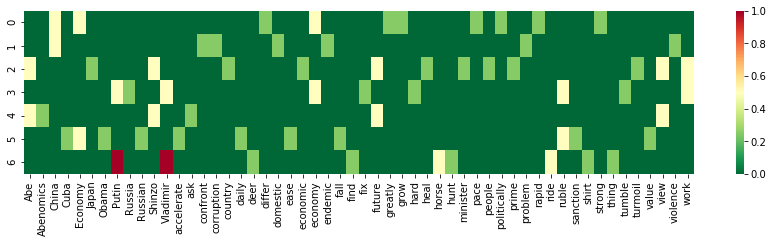

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 3))
sns.heatmap(tb / tb.max().max(), cmap="RdYlGn_r", annot=False);

## Exercise tf-idf

Collect at least 6 sentences from political parties in your country. Try to do tf-idf on them so that you can see what are the most common words used between the parties. You neeed to translate the sentences to english, so that I can evaluate :)